<a href="https://colab.research.google.com/github/ThalitaCoelhoAguiar/meus-notebooks-colab/blob/main/_Treinamento_CIS_2%C2%BA_Per%C3%ADodo_(Classifica%C3%A7%C3%A3o)_Thalita_Aguiar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Treinamento CIS - 2º Período (Classificação) - Thalita  Aguiar:

## Importação de Bibliotecas

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import math

### Importação do Dataset

In [ ]:
uploaded = files.upload()  # Selecione o CSV baixado
df = pd.read_csv(next(iter(uploaded)), sep=',')
df

Saving student_habits_performance.csv to student_habits_performance (3).csv


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


O dataset do estudo Hábitos dos Alunos vs. Desempenho Acadêmico: Um Estudo Simulado se refere a dados simulados de hábitos de 1000 alunos, em que cada linha representa um aluno relacionado com cada coluna capturando hábitos de vida diários, como tempo de estudo, sono, uso de mídias sociais, qualidade da dieta, avaliação de saúde mental e muito mais — mapeados em relação à nota final do exame. De acordo com a fonte, o dataset é estruturado, limpo e pronto para exploração, modelagem e narrativa.

In [ ]:
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


Os possíveis hábitos preditores da nota fina do exame são:
* idade;
* sexo;
* horas de estudo por dia;
* horas de mídias_sociais;
* horas netflix;
* emprego de meio período;
* porcentagem de frequência,
* horas de sono
* qualidade da dieta,
* frequência de exercícios
* nível de educação dos pais',
* qualidade da internet,
* classificação de saúde mental,
* participação extracurricular'

Hipóteses:



* Hipótese 1: Que as variáveis numéricas: horas de estudo por dia; porcentagem de frequência, horas de sono, frequência de exercícios, classificação de saúde mental são preditoras com efeito positivo sobre a nota final, ou seja, quanto maiores seus valores, maiores as notas finais do alunos.

* Hipótese 2:  Que as variáveis numéricas: horas em mídias sociaias, horas de netflix, são preditoras com efeito negativo sobre a nota final.

* Hipótese 3:  Qualidade da alimentação: vai possuir efeito positivo sobre a nota de acordo com a ordem Good>fair>poor, em que quanto melhor a alimentação, maiores os resultados no teste.

* Hipótese 4:  Nível de educação dos pais: vai possuir efeito positivo sobre a nota de acordo com a ordem Master>Bachelor>High School>None, em que quanto maior o nível educacional dos pais, maiores os resultados no teste dos estudantes.

* Hipótese 5: Qualidade da internet: vai possuir efeito positivo sobre a nota de acordo com a ordem Master>Bachelor>High School>None, em que quanto maior o nível educacional dos pais, maiores os resultados no teste dos estudantes.

* Hipótese 6: Participação extracurricular: vai possuir efeito positivo sobre a nota se 'extracurricular_participation = Yes' e vai impactar negativamente sobre nota se 'extracurricular_participation = No'.

* Hipótese 7: Emprego de meio-período: vai possuir efeito negativo sobre a nota se 'part_time = Yes' e não vai possuir efeito positivo sobre nota se 'part_time = No'.

* Hipótese 8: As variáveis com maior efeito significativo serão: horas de estudos por dia, porcentagem de frequência, emprego de meio período e classificação de saúde mental.

* Hipótese 9: Idade, gênero não vao apresentar efeito signiicativo sobre a diiminuição nota dos alunos


## Análise Exploratória de Dados (EDA)

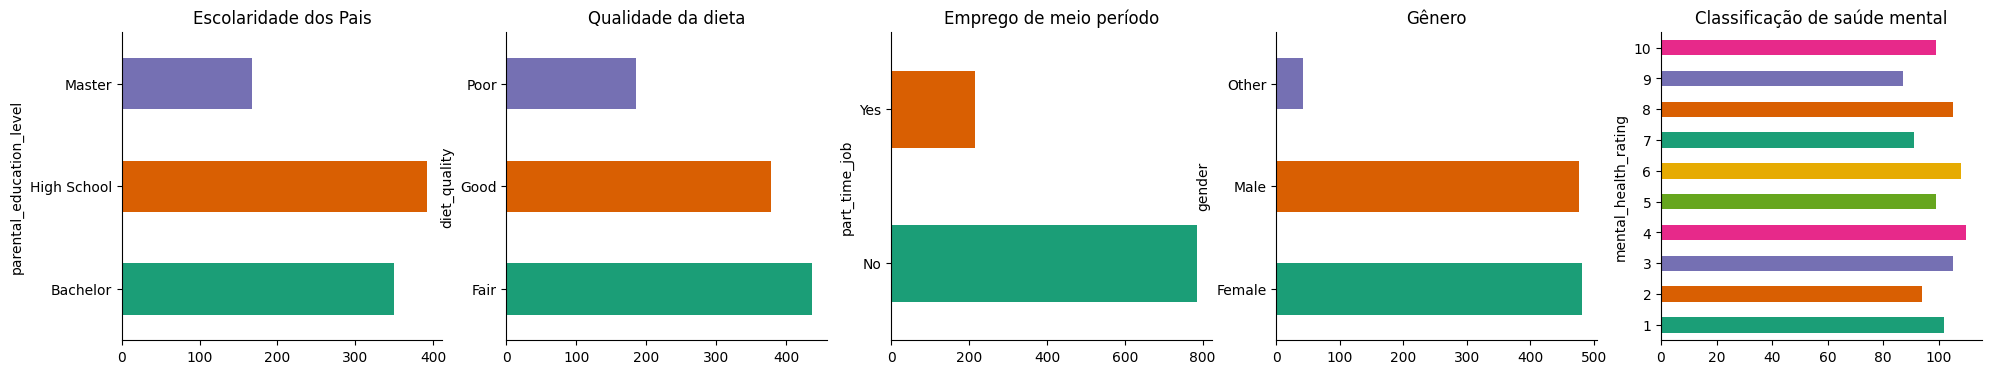

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(24, 4)) #Criando subplots

df.groupby('parental_education_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_title('Escolaridade dos Pais')

df.groupby('diet_quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1])
axes[1].spines[['top', 'right',]].set_visible(False)
axes[1].set_title('Qualidade da dieta')

df.groupby('part_time_job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[2])
axes[2].spines[['top', 'right',]].set_visible(False)
axes[2].set_title('Emprego de meio período')

df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[3])
axes[3].spines[['top', 'right',]].set_visible(False)
axes[3].set_title('Gênero')

df.groupby( 'mental_health_rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[4])
axes[4].spines[['top', 'right',]].set_visible(False)
axes[4].set_title('Classificação de saúde mental')

plt.show()

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


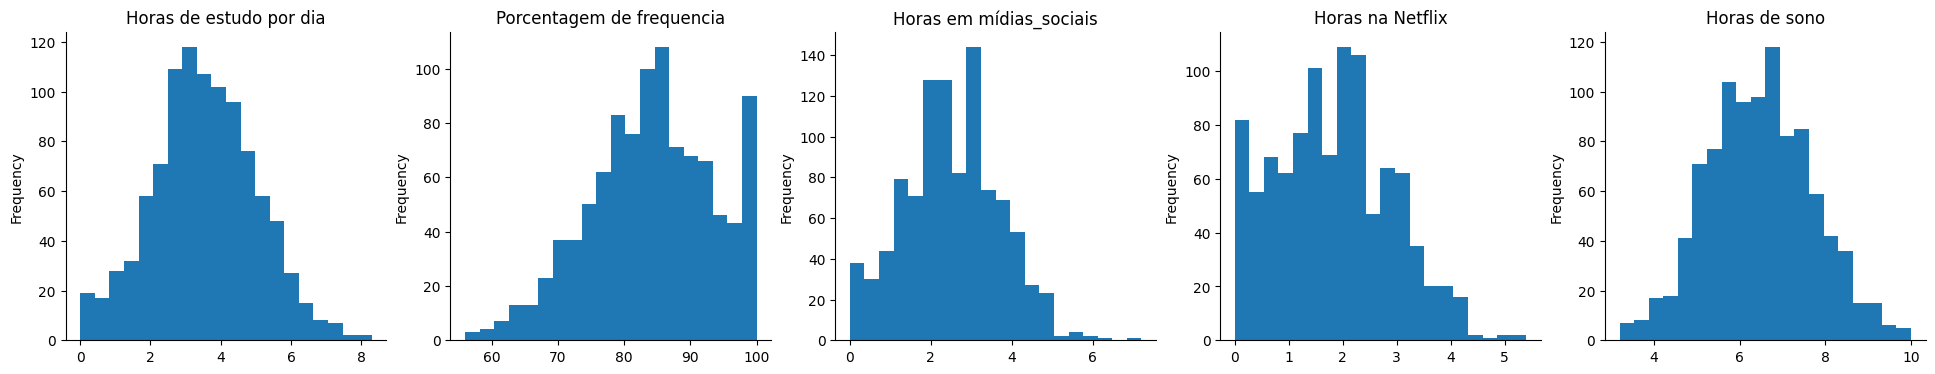

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(24, 4)) #Criando subplots

df['study_hours_per_day'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_title('Horas de estudo por dia')

df['attendance_percentage'].plot(kind='hist', bins=20, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_title('Porcentagem de frequencia')

df['social_media_hours'].plot(kind='hist', bins=20, ax=axes[2])
axes[2].spines[['top', 'right']].set_visible(False)
axes[2].set_title('Horas em mídias_sociais')

df['netflix_hours'].plot(kind='hist', bins=20, ax=axes[3])
axes[3].spines[['top', 'right']].set_visible(False)
axes[3].set_title('Horas na Netflix')

df['sleep_hours'].plot(kind='hist', bins=20, ax=axes[4])
axes[4].spines[['top', 'right']].set_visible(False)
axes[4].set_title('Horas de sono')

plt.show()

In [ ]:
data_numeric = df.select_dtypes(include=[float, int]) #selecionar apenas colunas numericas

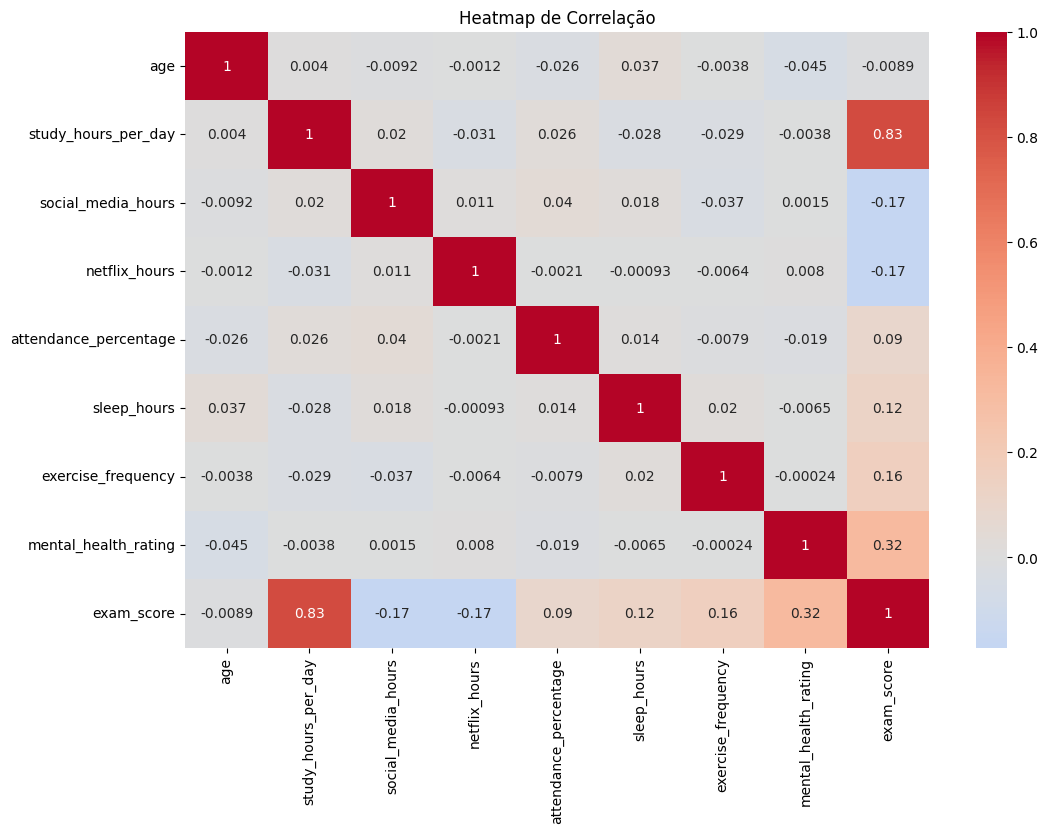

In [ ]:
# Calcular a matriz de correlação
corr_matrix = data_numeric.corr()

# Plotar o heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()

pela matriz de correlaçao, observa-se que

* as variáveis tem baixa correlaçao entre si e que a considerável é a variável de horas estudadas por dia tem bastante correlação com a nota do exame.
* A classificação de saúde mental possui correlação considerável com a nota do exame.
*   As maiores correlações negativas são: horas em redes sociais e  horas na Netflix.

* Observa-se que A análise bivariada mostra a relação de cada variável dependente com a variável independente, de forma direta, sem contar com a interação de outras variávéis em cada relação.


In [ ]:
target_variable = 'exam_score'
features = [col for col in data_numeric.columns if col != target_variable]

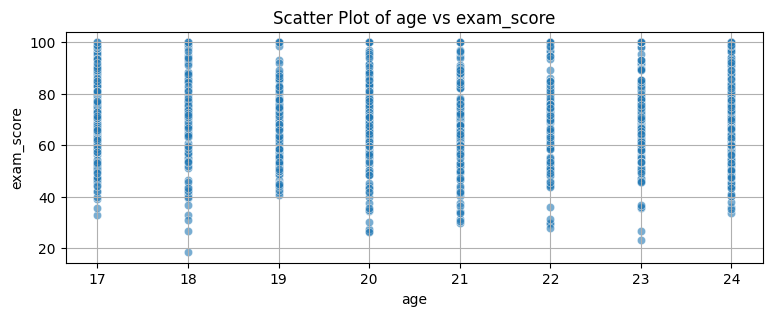

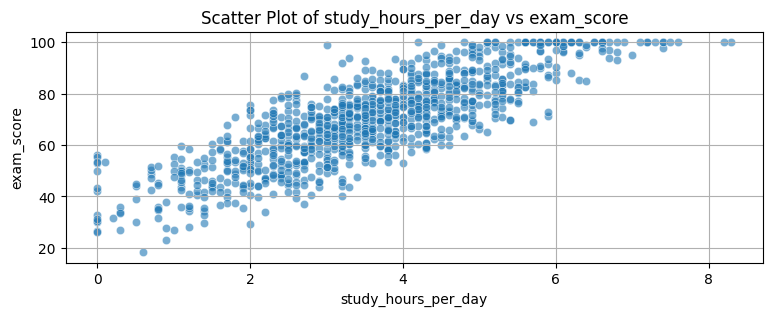

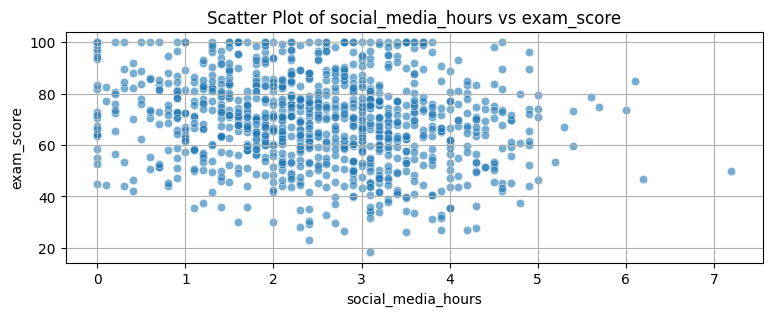

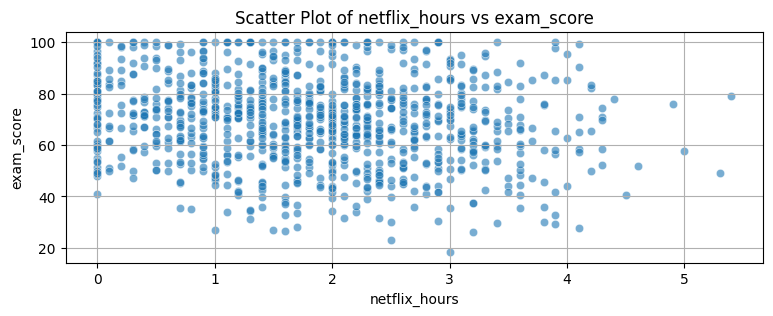

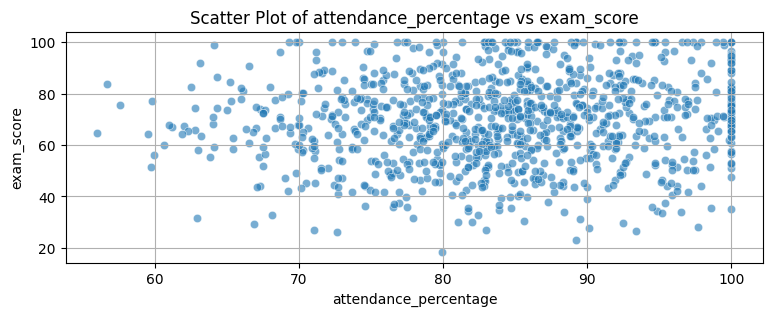

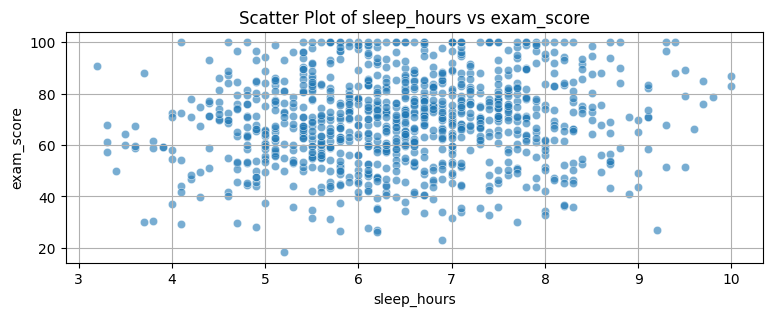

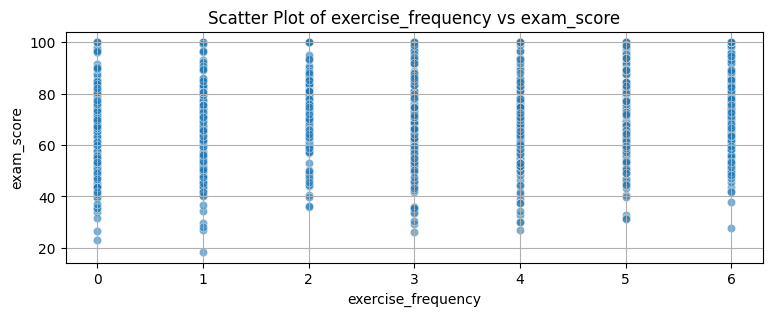

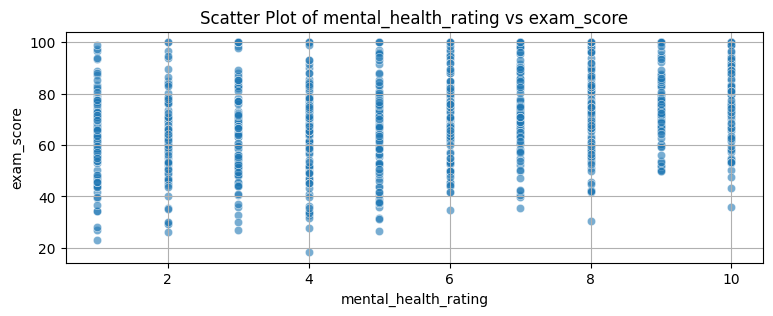

In [ ]:
# Função para criar gráficos de dispersão
def create_scatter_plot(feature):
    plt.figure(figsize=(9, 3))
    sns.scatterplot(data=data_numeric, x=feature, y=target_variable, alpha=0.6)
    plt.title(f'Scatter Plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.grid(True)
    plt.show()

# Gerar gráficos para cada característica
for feature in features:
    create_scatter_plot(feature)

## Regressao multivariada

Capta as relações entre as variáveis.

In [ ]:
X = data_numeric[features] # Seleciona as variáveis preditoras
y = data_numeric[target_variable] # Seleciona a variável alvo

lm = LinearRegression() #Modelo de Regressão Linear

lm.fit(X, y)
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)

                           Coef
age                   -0.014093
study_hours_per_day    9.574681
social_media_hours    -2.620032
netflix_hours         -2.277095
attendance_percentage  0.144634
sleep_hours            2.005627
exercise_frequency     1.451794
mental_health_rating   1.948393


Nota-se, novamente, que:


*    a quantidade de estudo diárias é o que mais impacta positivamente na variável alvo: nota do exame.
*   a quantidade de horas em redes sociais e na netflix impactam negativamente.
* Impactam positivamente nessa ordem: horas de sono>classficaçao de saúde mental>frequencia de exercício.






* A EDA foi consistente com a  hipótese 1, em que a variável mais correlacionada eram a quantidade de horas de estudo diários de acordo com a correlaçao e com os coeficientes de regressão.

* Também foi consistente com a hipótese 2 de que horas em redes sociais e na netflix eram preditivos negativos para notas

* Também foi consistente que idade e gênero tinham pouca significancia estatística e pouca correlação com nota final.

* Nao foi consistente com a hipótese de outras variáveis terem efeito
 grande efeito significativo sobre o exame como nivel de escolaridade dos pais, dieta., frequencia de exercício físico, etc

## Clustering com K-means



*   Objetivo: Vai agrupar os alunos baseado em seu hábitos.

* Método: Vai agrupar as os dados baseado na distancia  e atribui cada ponto ao centróide mais próximo (Distância de Manhatan) e usa as distâncias para agrupar os dados e recalcular o centróide em que o centróide de cada grupo é a média dos pontos atribuídos a ele. Esse algoritmo é repetido até que o centróide permaneca o mesmo, logo os dados estão agrupados. O código é inicializado com o k-means e especifica quantos grupos serão feitos.

In [ ]:
train, test= train_test_split(data_numeric, test_size=0.3)

In [ ]:
X_train=train[['social_media_hours','study_hours_per_day']] #Agrupa os alunos que têm hábitos semelhantes de estudo e redes sociais.

### Definindo a quantidade de clusters pelo método  (Elbow Method)


busca uma quantidade de agrupamentos em que a soma dos quadrados intra-clusters (wcss ou inertia) seja a menor possível.

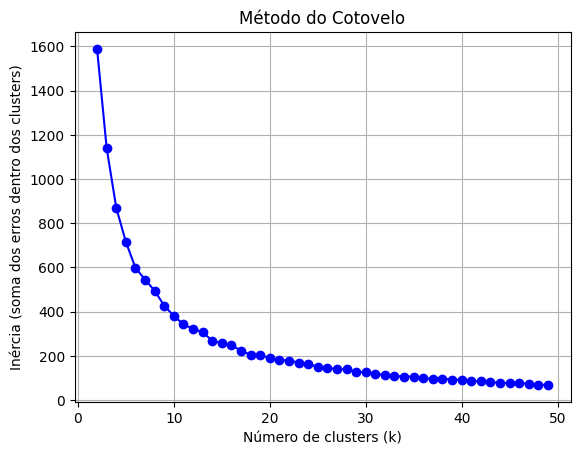

In [ ]:
#Calculando Inercia: Soma dos erros intra-clusters

def calculate_inertia(data):
    inertia = []
    # Define a list of k values to use
    k_values = range(2, 50)
    for k in k_values:
        # Corrected parameter name to n_clusters
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data)
        inertia.append(kmeans.inertia_)

    return k_values, inertia # Return both k_values and inertia

#Gráfico

# Get the k_values and inertia from the function
k_values, inertia = calculate_inertia(X_train)

# Plot using the returned k_values
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia (soma dos erros dentro dos clusters)')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()

 o ponto que indica o equilíbrio entre maior homogeneidade dentro do cluster e a maior diferença entre clusters, é o ponto da curva mais distante (cotovelo) de uma reta traçada entre as extermidade da curva. A fórmula é dada a seguir:

A distância entre um ponto \( (x, y) \) e a reta que passa pelos pontos \( P_0 = (x_0, y_0) \) e \( P_1 = (x_1, y_1) \) é dada por:

$
\text{distance}(P_0, P_1, (x, y)) =
\frac{\left| (y_1 - y_0)x - (x_1 - x_0)y + x_1 y_0 - y_1 x_0 \right|}
{\sqrt{(y_1 - y_0)^2 + (x_1 - x_0)^2}}
$

o cálculo foi evidenciado a seguir

In [ ]:
def optimal_number_of_clusters(inertia):
    x1, y1 = 2, inertia[0]
    x2, y2 = 20, inertia[len(inertia)-1]

    distances = []
    for i in range(len(inertia)):
        x0 = i+2
        y0 = inertia[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

In [ ]:
inertia = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k).fit(X)
    inertia.append(kmeans.inertia_)

k_otimo = optimal_number_of_clusters(inertia)
print("Número ótimo de clusters:", k_otimo)

Número ótimo de clusters: 5


In [ ]:
kmeans=KMeans(n_clusters=5) #Determinando K_means
kmeans.fit(X_train) #Treinando o modelo
X_clustered = kmeans.predict(X_train) #Fazendo predição

Text(0, 0.5, 'horas de estudo por dia')

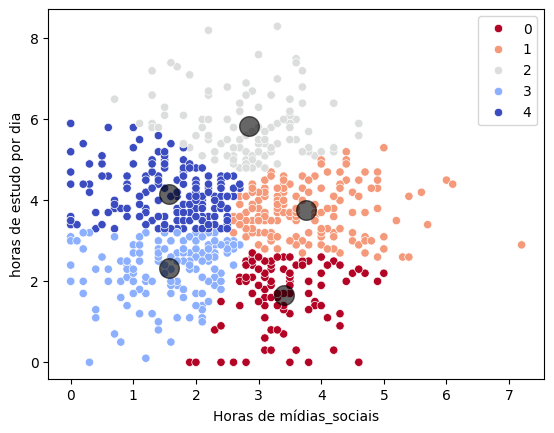

In [ ]:
sns.scatterplot(data=X_train, x='social_media_hours', y='study_hours_per_day', hue=X_clustered, palette="coolwarm_r") #Plotando clusters

# Plotando os centróides
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)

plt.xlabel("Horas de mídias_sociais")
plt.ylabel("horas de estudo por dia")

 A clusteriação de comportamento dos estudante quanto as horas estudas e tempo na mídicas sociais mostra formação de grupos bem distribuídos e com variedade em que os alunos sao bem rotulados quanto a quantidade de horas estudadas diaramente.